# Proyecto Final
* Leonardo Rodrigues de Andrade
* Data Engineer - Grupo 1

# Producto 1
* Análisis Exploratorio de los datos, utilizando los conceptos, técnicas y herramientas vistos en clase que sean de utilidad para llevar a cabo este producto.

#### Import librerias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Import Datas

In [2]:
df = pd.read_csv('asteroseismology.csv')

In [3]:
df.head(10)

,POP,Dnu,numax,epsilon
0,1,4.44780,43.06289,0.985
1,0,6.94399,74.07646,0.150
2,1,2.64571,21.57891,0.855
3,1,4.24168,32.13189,0.840
4,0,10.44719,120.37356,0.275
5,1,4.31470,37.59315,0.945
6,1,4.46724,46.71595,0.985
7,0,7.63714,87.44575,0.215
8,1,4.07682,34.78433,0.885
9,1,4.15871,31.50166,0.855


#### Verificando los data types

In [4]:
len(df)

1001

#### Verificando los data types

In [5]:
df.dtypes

POP          int64
Dnu        float64
numax      float64
epsilon    float64
dtype: object

#### Verificando valores nulos

In [6]:
df.isnull().sum()

POP        0
Dnu        0
numax      0
epsilon    0
dtype: int64

#### Análisis visual

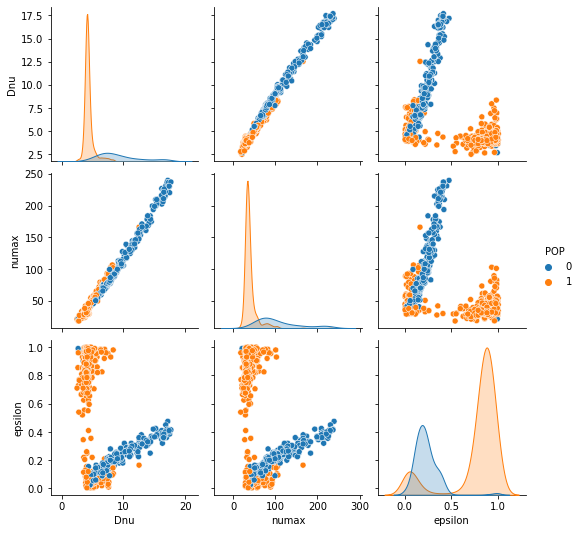

In [7]:
sns.pairplot(data=df, hue='POP')

In [8]:
df['POP'] = df['POP'].astype(bool)

#### Violin plot for each parameter x POP

<AxesSubplot:xlabel='Dnu'>

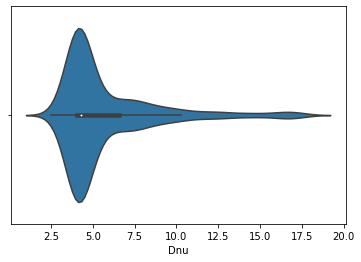

In [9]:
sns.violinplot(x ="Dnu", hue ="POP", data = df, split = True)

<AxesSubplot:xlabel='numax'>

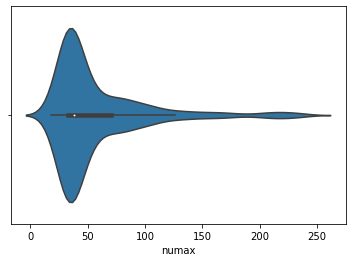

In [10]:
sns.violinplot(x ="numax", hue ="POP", data = df, split = True)

<AxesSubplot:xlabel='epsilon'>

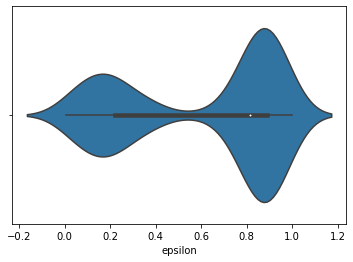

In [11]:
sns.violinplot(x ="epsilon", hue ="POP", data = df, split = True)

### Divide entre 4 valores los parametros

In [12]:
df_a = df

<AxesSubplot:xlabel='dnu_range', ylabel='POP'>

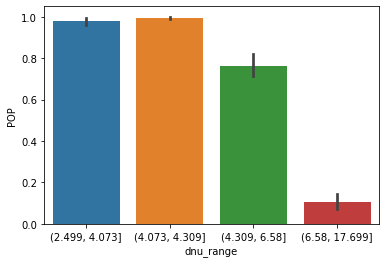

In [13]:
df_a['dnu_range'] = pd.qcut(df_a['Dnu'], 4)
 
# Barplot - Muestra valores aproximados basados
# sobre la altura de las barras.
sns.barplot(x ='dnu_range', y ='POP', data = df_a)

<AxesSubplot:xlabel='numax_range', ylabel='POP'>

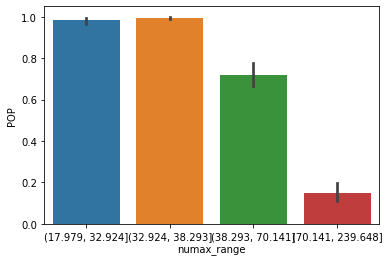

In [14]:
df_a['numax_range'] = pd.qcut(df_a['numax'], 4)
 
# Barplot - Muestra valores aproximados basados
# sobre la altura de las barras.
sns.barplot(x ='numax_range', y ='POP', data = df_a)

<AxesSubplot:xlabel='epsilon_Range', ylabel='POP'>

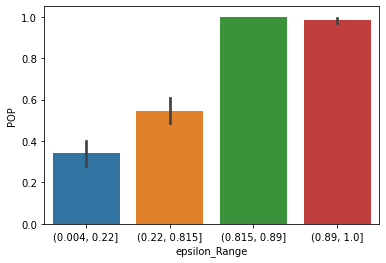

In [15]:
df_a['epsilon_Range'] = pd.qcut(df_a['epsilon'], 4)
 
# Barplot - Muestra valores aproximados basados
# sobre la altura de las barras.
sns.barplot(x ='epsilon_Range', y ='POP', data = df_a)

# Producto 2
* Modelo de aprendizaje de máquina que permita clasificar un gigante rojo de acuerdo a la clase RGB ó HeB.

### Formulación del Modelo

In [16]:
# Modelo con Dnu, numax y epsilon; Estimated POP
X = df[['Dnu','numax', 'epsilon']]
y = df['POP']

### Escalamiento

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
# utilizaremos el escalador estandar (estandarización)
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [19]:
#X_sc = scaler.transform(X)
X_sc  = X

In [20]:
X_sc[:5]

,Dnu,numax,epsilon
0,4.44780,43.06289,0.985
1,6.94399,74.07646,0.150
2,2.64571,21.57891,0.855
3,4.24168,32.13189,0.840
4,10.44719,120.37356,0.275


### Validación Cruzada

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25, random_state=41)

### Entrenamiento KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

### Evaluación del Modelo

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [26]:
# realizando predicciones en el set de test
y_pred = knn.predict(X_test)

In [27]:
accuracy_score(y_test,y_pred)

0.9243027888446215

In [28]:
confusion_matrix(y_test, y_pred)

array([[ 64,   5],
       [ 14, 168]], dtype=int64)

### Determinación del valor de K
Como no hay forma de saber de antemano qué valor de K da los mejores resultados en el primer intento, por defecto fue selecionado k=5 y resultó en un 98.80% de precisión.

Para encontrar el mejor valor de K es trazar el gráfico del valor de K y la tasa de error correspondiente para el conjunto de datos, trazando el "error medio" de los valores pronosticados del conjunto de prueba para todos los valores de K entre 1 y 40.

Text(0, 0.5, 'error medio')

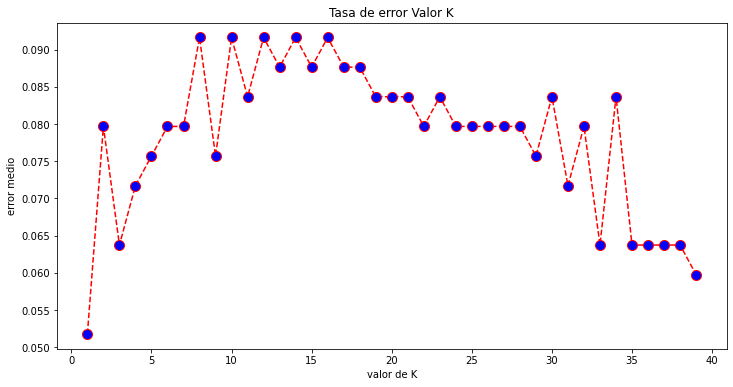

In [29]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
# Plotting the result
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Tasa de error Valor K')
plt.xlabel('valor de K')
plt.ylabel('error medio')

#### Resultado
Para k=1 y resultó en un 94.82% de precisión y el menor error medio, por eso fue la mejor posible.

#### Entrenamiento con el valor de K seleccionado
Con el grafico, selecionaremos k = 5

In [30]:
n_neighbors=1

In [31]:
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### Métricas con el valor de K seleccionado

In [32]:
y_pred = knn.predict(X_test)

In [33]:
X_test

,Dnu,numax,epsilon
219,12.91457,166.16237,0.380
522,4.40485,38.76543,0.865
834,4.28325,29.30846,0.550
484,4.66314,44.28373,0.930
816,7.54723,92.04654,0.030
...,...,...,...
739,4.13245,35.38870,0.845
600,3.87842,33.50009,0.865
881,4.08904,33.59330,0.870
746,17.43134,229.68344,0.400


In [34]:
accuracy_score(y_test, y_pred)

0.9482071713147411

In [35]:
confusion_matrix(y_test, y_pred)

array([[ 64,   5],
       [  8, 174]], dtype=int64)

### Haciendo algunas predicciones

* Know inputs -> output to test predictions
* True	4.44780	43.06289	0.985
* False	6.94399	74.07646	0.150
* True	2.64571	21.57891	0.855

In [36]:
# predicciones sobre un valor
p1 = [[4.44780, 43.06289, 0.985],
      [6.94399, 74.07646, 0.150],
      [2.64571, 21.57891, 0.855]]
knn.predict(p1)

array([ True, False,  True])

# Producto 3
Una aplicación Python de consola que permita realizar la predicción de un gigante rojo a partir de sus características, utilizando el modelo entrenado anteriormente. La idea es que el aplicativo se ejecute en la consola, permita el ingreso de los parámetros de entrada (dnu, numax, etc), y el aplicativo retorne qué clase de gigante rojo se trata.

In [37]:
import joblib

In [38]:
# serializamos modelo entrenado
joblib.dump(knn, 'knn_model.pkl')

['knn_model.pkl']

In [39]:
# serializamos escalador con parametros ajustados
joblib.dump(scaler, 'scaler_model.pkl')

['scaler_model.pkl']

In [41]:
%run predict_test_consola.py

Predictions: RGB (Red Giant Branch) or HeB (Helium Burning)
Ingrese valor de Dnu: 6.94399
6.94399
Ingrese valor de numax: 74.07646
74.07646
Ingrese valor de epsilon: 0.150
0.15
RGB (Red Giant Branch)


<Figure size 432x288 with 0 Axes>

---